<function matplotlib.pyplot.show>

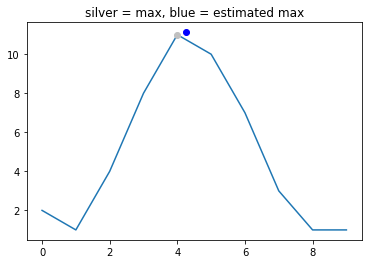

In [9]:
from numpy import argmax
import matplotlib.pyplot as plt
from utils import parabolic
from utils import freq_from_crossings, freq_from_fft, freq_from_autocorr
import numpy as np
import math
from __future__ import division
from numpy.fft import rfft, irfft
from numpy import argmax, sqrt, mean, absolute, linspace, log10, logical_and, average, diff, correlate, nonzero
from matplotlib.mlab import find
from scipy.signal import blackmanharris, fftconvolve
import time
import sys

y = [2, 1, 4, 8, 11, 10, 7, 3, 1, 1]

xm, ym = argmax(y), y[argmax(y)]
xp, yp = parabolic(y, argmax(y))

plot = plt.plot(y)
plt.plot(xm, ym, 'o', color='silver')
plt.plot(xp, yp, 'o', color='blue')
plt.title('silver = max, blue = estimated max')
plt.show

In [2]:
x = np.linspace(0, 2 * np.pi*50, 1024)
sinewave = np.sin(x)

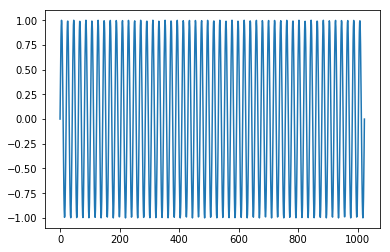

In [3]:
plt.plot(sinewave)
plt.show()

In [4]:
f1 = freq_from_crossings(sinewave, 1)
f2 = freq_from_fft(sinewave, 1)
f3 = freq_from_autocorr(sinewave, 1)

(array([  10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   31,
         32,   33,   34,   35,   36,   37,   38,   39,   40,   51,   52,
         53,   54,   55,   56,   57,   58,   59,   60,   72,   73,   74,
         75,   76,   77,   78,   79,   80,   81,   92,   93,   94,   95,
         96,   97,   98,   99,  100,  101,  113,  114,  115,  116,  117,
        118,  119,  120,  121,  122,  133,  134,  135,  136,  137,  138,
        139,  140,  141,  142,  153,  154,  155,  156,  157,  158,  159,
        160,  161,  162,  163,  174,  175,  176,  177,  178,  179,  180,
        181,  182,  183,  194,  195,  196,  197,  198,  199,  200,  201,
        202,  203,  204,  215,  216,  217,  218,  219,  220,  221,  222,
        223,  224,  235,  236,  237,  238,  239,  240,  241,  242,  243,
        244,  245,  256,  257,  258,  259,  260,  261,  262,  263,  264,
        265,  276,  277,  278,  279,  280,  281,  282,  283,  284,  285,
        297,  298,  299,  300,  301,  302,  303,  

TypeError: slice indices must be integers or None or have an __index__ method

TypeError: only integer scalar arrays can be converted to a scalar index

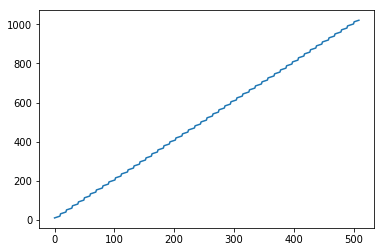

In [19]:
f3 = freq_from_autocorr_2(sinewave, 1)

In [18]:
def freq_from_autocorr_2(sig, fs):
    """Estimate frequency using autocorrelation
    
    Pros: Best method for finding the true fundamental of any repeating wave, 
    even with strong harmonics or completely missing fundamental
    
    Cons: Not as accurate, currently has trouble with finding the true peak
    
    """
    # Calculate autocorrelation and throw away the negative lags
    corr = fftconvolve(sig, sig[::-1], mode='full')
    corr = corr[len(corr)//2:]
    
    # Find the first low point
    d = diff(corr)
    start = nonzero(d > 0)[0]
    plt.plot(start)
    
    # Find the next peak after the low point (other than 0 lag).  This bit is 
    # not reliable, due to peaks that occur between samples.
    peak = argmax(corr[start:]) + start
    px, py = parabolic(corr, peak)
    
    return fs / px

In [ ]:
f2

In [ ]:
f3

In [ ]:
f1

In [ ]:
y

In [ ]:
def indices(a, func):
    return [i for (i, val) in enumerate(a) if func(val)]

In [ ]:
idx = np.nonzero(y[1:] >= 0)

In [ ]:
y[1:]